from matplotlib import font_manager
font_fname = "C:\\Users\\acorn-516\\Desktop\\jupyter\\font\\gulim.ttp"
font_family = font_manager.FontProperties(fname=font_fname).get_name()
plt.rcParams["font.family"] = font_family
print(font_family)

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

from matplotlib import font_manager
font_fname = "C:\\Windows\\Fonts\\gulim.ttc"
font_family = font_manager.FontProperties(fname=font_fname).get_name()
plt.rcParams["font.family"] = font_family
print(font_family)


Gulim


In [2]:
df = pd.read_csv("df_tot_08.csv")
df.info()
df=df.drop("Unnamed: 0.1",axis=1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7058 entries, 0 to 7057
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    7058 non-null   int64 
 1   Unnamed: 0.1  7058 non-null   int64 
 2   coIndx        7058 non-null   int64 
 3   category      7058 non-null   object
 4   city          7058 non-null   object
 5   region        7058 non-null   object
 6   coNm          7058 non-null   object
 7   title         7058 non-null   object
 8   career        7058 non-null   object
 9   education     7058 non-null   object
 10  contract      7058 non-null   object
 11  r_date        7058 non-null   object
 12  coID          7058 non-null   int64 
 13  salary        7058 non-null   object
 14  addr          6689 non-null   object
dtypes: int64(4), object(11)
memory usage: 827.2+ KB


In [3]:
df.info()
df=df.drop("Unnamed: 0",axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7058 entries, 0 to 7057
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  7058 non-null   int64 
 1   coIndx      7058 non-null   int64 
 2   category    7058 non-null   object
 3   city        7058 non-null   object
 4   region      7058 non-null   object
 5   coNm        7058 non-null   object
 6   title       7058 non-null   object
 7   career      7058 non-null   object
 8   education   7058 non-null   object
 9   contract    7058 non-null   object
 10  r_date      7058 non-null   object
 11  coID        7058 non-null   int64 
 12  salary      7058 non-null   object
 13  addr        6689 non-null   object
dtypes: int64(3), object(11)
memory usage: 772.1+ KB


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7058 entries, 0 to 7057
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   coIndx     7058 non-null   int64 
 1   category   7058 non-null   object
 2   city       7058 non-null   object
 3   region     7058 non-null   object
 4   coNm       7058 non-null   object
 5   title      7058 non-null   object
 6   career     7058 non-null   object
 7   education  7058 non-null   object
 8   contract   7058 non-null   object
 9   r_date     7058 non-null   object
 10  coID       7058 non-null   int64 
 11  salary     7058 non-null   object
 12  addr       6689 non-null   object
dtypes: int64(2), object(11)
memory usage: 717.0+ KB


In [5]:
df=df.drop("addr",axis=1)

In [6]:
df.head(1)

,coIndx,category,city,region,coNm,title,career,education,contract,r_date,coID,salary
0,38262896,데이터분석,서울,강남구,㈜인텔리코드,"데이터분석개발정규직모집(신입,경력)",경력무관,대졸,정규직,0804,1428123607,"3,803"


In [7]:
df["category"].value_counts()
#키워드별 데이터분석, 데이터관리, 인공지능, 빅데이터

데이터분석    2334
데이터관리    2124
인공지능     1450
빅데이터     1150
Name: category, dtype: int64

## 지역별 채용공고현황(수도권vs비수도권)

In [8]:
df.groupby(["city"]).count().sort_values(by=["coNm"],ascending=False).head(5)

,coIndx,category,region,coNm,title,career,education,contract,r_date,coID,salary
city,,,,,,,,,,,
서울,4714,4714,4714,4714,4714,4714,4714,4714,4714,4714,4714
경기,1189,1189,1189,1189,1189,1189,1189,1189,1189,1189,1189
인천,178,178,178,178,178,178,178,178,178,178,178
부산,171,171,171,171,171,171,171,171,171,171,171
경남,169,169,169,169,169,169,169,169,169,169,169


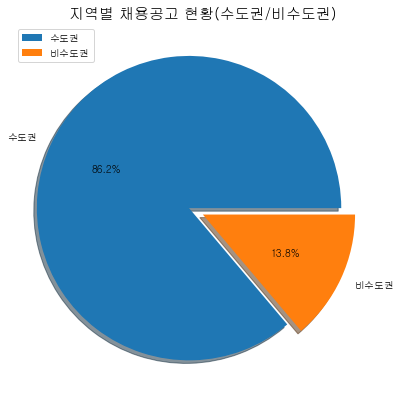

In [9]:
sumOfSeoul=df["city"].value_counts().values[0:3].sum() #서울,경기,인천
nonOfSeoul=df["city"].value_counts().values[3:].sum()

values = [sumOfSeoul, nonOfSeoul]
categories=["수도권","비수도권"]
explode=[0.1,0]
#그리기
plt.figure(figsize=(7,7))
plt.pie(values,
       explode=explode,
       labels=categories,
       autopct="%1.1f%%",
       shadow=True,
       startangle=0)
plt.title("지역별 채용공고 현황(수도권/비수도권)",color="black",fontsize=15)
plt.legend(categories,loc=2)
plt.show()

###  키워드별 지역별로 채용공고수는 얼마인가!

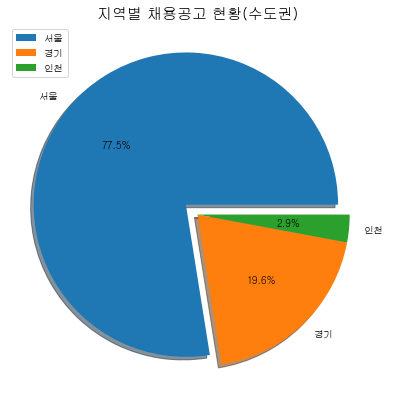

In [10]:
values = df["city"].value_counts().values[0:3]
#explode
categories = ["서울","경기","인천"]
explode = [0.1,0,0]
#그리기
plt.figure(figsize=(7,7))
plt.pie(values,
        explode= explode,
        labels=df["city"].value_counts().index[0:3],
        autopct="%1.1f%%",
        shadow=True, 
        startangle=0)
plt.title("지역별 채용공고 현황(수도권)",color="black",fontsize=15)
plt.legend(categories,loc=2)
plt.show()

## 키워드별(데이터분석,데이터관리,인공지능,빅데이터)

In [11]:
df.groupby(["category"]).count()[["coIndx","city"]].sort_values(by=["coIndx"],ascending=False)

,coIndx,city
category,,
데이터분석,2334,2334
데이터관리,2124,2124
인공지능,1450,1450
빅데이터,1150,1150


(array([   0.,  500., 1000., 1500., 2000., 2500.]),
 <a list of 6 Text yticklabel objects>)

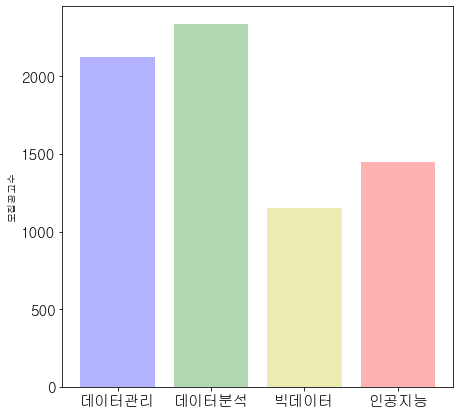

In [12]:
values = df.groupby(["category"]).count()["coIndx"]
df.groupby(["category"]).count().index
fig, ax=plt.subplots(figsize=(7,7))
ax.bar(df.groupby(["category"]).count().index,
      values,
      alpha=0.3,
      color=["b","g","y","r"],
      align="center")
ax.set_ylabel("모집공고수")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


### 서울지역 분야별 모집현황

In [13]:
df[df["city"]=="서울"]["category"].value_counts()

데이터분석    1695
데이터관리    1292
인공지능      899
빅데이터      828
Name: category, dtype: int64

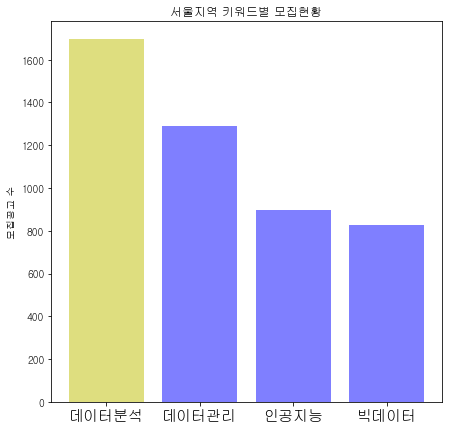

In [14]:
#bar그래프로 그려보자
df_seoul = df[df["city"]=="서울"]
values = df_seoul["category"].value_counts().values

#그래프
fig, ax=plt.subplots(figsize=(7,7))
ax.bar(df_seoul["category"].value_counts().index,
       values,
       color=["y","b","b","b"],
       alpha=0.5,
       align="center"
       )
ax.set_ylabel('모집공고 수')
ax.set_title("서울지역 키워드별 모집현황")
plt.xticks(fontsize=15)

plt.show()

In [15]:
df_seoul[df_seoul['category']=="데이터분석"]["career"].unique()

array(['경력무관', '경력3년', '경력2년', '경력1년', '경력', '신입'], dtype=object)

### 서울 내 '데이터분석' 경력별 모집현황!

In [16]:
df["career"].value_counts()

경력무관     4209
경력3년      798
경력1년      566
경력        486
경력2년      442
경력5년      251
신입        184
경력7년       57
경력8년       46
경력10년      19
Name: career, dtype: int64

### 서울지역에 데이터분석 관련 직종 중 계약분포도!

Text(0.5, 1.0, '경력조건별 서울지역 채용공고(데이터분석분야)')

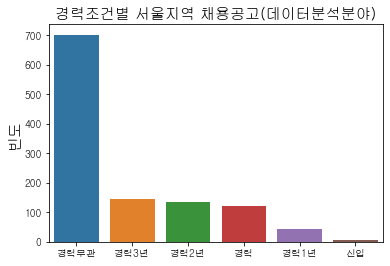

In [17]:
#연봉이 나와있지 않는 회사는 지우고 계산한다.
df[df["salary"] =="None"].index

df1 = df.drop(df[df["salary"] =="None"].index,axis=0)

df2 = df1[(df1["city"]=="서울")&(df1["category"]=="데이터분석")]
df2["career"].value_counts()

sns.barplot(x=df2["career"].value_counts().index,
            y=df2["career"].value_counts().values
            )


plt.ylabel("빈도",fontsize=15)
plt.title("경력조건별 서울지역 채용공고(데이터분석분야)",fontsize=15)

Gulim


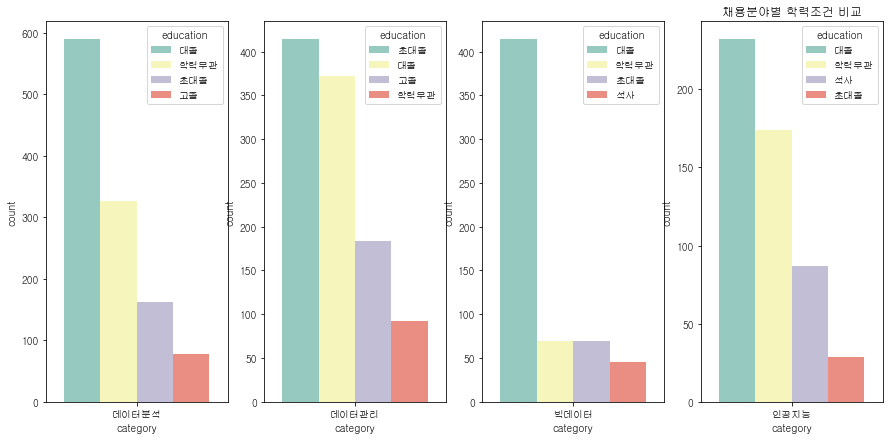

In [18]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

from matplotlib import font_manager
font_fname = "C:\\Windows\\Fonts\\gulim.ttc"
font_family = font_manager.FontProperties(fname=font_fname).get_name()
plt.rcParams["font.family"] = font_family
print(font_family)




df2 = df1[(df1["city"]=="서울")] #df2: 서울지역
df3 = df2[df2["category"] =="데이터분석"]
df4 = df2[df2["category"]=="데이터관리"]
df5 = df2[df2["category"]=="빅데이터"]
df6 = df2[df2["category"]=="인공지능"]

fig, ax = plt.subplots(nrows=1,ncols=4,figsize=(15,7))
sns.countplot(x="category",
              data=df3, 
              ax=ax[0],
              #order=df3["category"].value_counts().index,
              hue="education",
              hue_order=df3["education"].value_counts().index,
              palette="Set3"

              
             )
sns.countplot(x="category",
             data=df4,
             ax=ax[1],
             #order=df4["category"].value_counts().index,
             hue="education",
             hue_order=df4["education"].value_counts().index,
             palette="Set3"
             )

sns.countplot(x="category",
             data=df5,
             ax=ax[2],
             #order=df4["category"].value_counts().index,
             hue="education",
             hue_order=df5["education"].value_counts().index,
             palette="Set3"
             )


sns.countplot(x="category",
             data=df6,
             ax=ax[3],
             #order=df4["category"].value_counts().index,
             hue="education",
             hue_order=df6["education"].value_counts().index,
             palette="Set3"
             )

plt.title("채용분야별 학력조건 비교")
plt.show()

#fig

### 경력별모집인원은 어떻게 되는가? -> 신입&경력무관이면서 대졸이상 채용회사들의 분포!

In [19]:
df["career"].value_counts()

경력무관     4209
경력3년      798
경력1년      566
경력        486
경력2년      442
경력5년      251
신입        184
경력7년       57
경력8년       46
경력10년      19
Name: career, dtype: int64

In [20]:
# 함수만들기
def careerReset(career):
    result = 0
    if career =="경력1년":
        result = 1
    elif career =="신입":
        result = 0
    elif career =="경력무관":
        result = 0
    elif career =="경력":
        result = 1
    elif career =="경력2년":
        result = 2
    elif career == "경력3년":
        result = 3
    else:
        result = 5
    return result

df["career"] = df["career"].apply(lambda x: careerReset(x))
    
        

Gulim


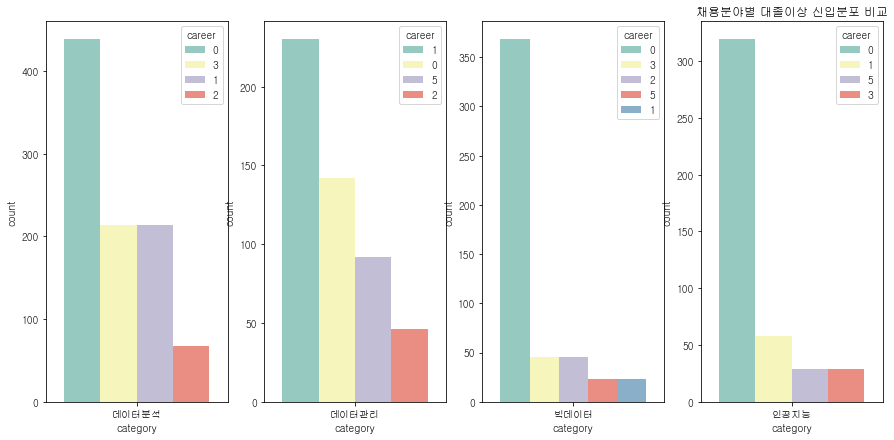

In [21]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

from matplotlib import font_manager
font_fname = "C:\\Windows\\Fonts\\gulim.ttc"
font_family = font_manager.FontProperties(fname=font_fname).get_name()
plt.rcParams["font.family"] = font_family
print(font_family)


df_careerIsNew = df
df_careerIsNew_seoul = df_careerIsNew[df_careerIsNew["city"]=="서울"]   #서울지역 경력무관,신입으로 조회한 경우
df_careerIsNew_seoul["education"].value_counts()
df_tot = df_careerIsNew_seoul[(df_careerIsNew_seoul["education"] == "대졸") | (df_careerIsNew_seoul["education"] == "석사")]
df_tot

df_samp01 = df_tot[df_tot["category"] =="데이터분석"]
df_samp02 = df_tot[df_tot["category"]=="데이터관리"]
df_samp03 = df_tot[df_tot["category"]=="빅데이터"]
df_samp04 = df_tot[df_tot["category"]=="인공지능"]


fig, ax = plt.subplots(nrows=1,ncols=4,figsize=(15,7))
sns.countplot(x="category",
              data=df_samp01, 
              ax=ax[0],
              #order=df3["category"].value_counts().index,
              hue="career",
              hue_order=df_samp01["career"].value_counts().index,
              palette="Set3"

              
             )
sns.countplot(x="category",
              data=df_samp02, 
              ax=ax[1],
              #order=df3["category"].value_counts().index,
              hue="career",
              hue_order=df_samp02["career"].value_counts().index,
              palette="Set3"

              
             )
sns.countplot(x="category",
              data=df_samp03, 
              ax=ax[2],
              #order=df3["category"].value_counts().index,
              hue="career",
              hue_order=df_samp03["career"].value_counts().index,
              palette="Set3"

              
             )
sns.countplot(x="category",
              data=df_samp04, 
              ax=ax[3],
              #order=df3["category"].value_counts().index,
              hue="career",
              hue_order=df_samp04["career"].value_counts().index,
              palette="Set3"

              
             )

plt.title("채용분야별 대졸이상 신입분포 비교")
plt.show()



### 평균연봉비교

In [22]:
df["category"] = df["category"].astype("category")

df["category"].cat.set_categories(["데이터분석","데이터관리","빅데이터","인공지능"],
                                   inplace=True)

#pivot_table은 수치화된 자료만 볼 수 있다!


In [23]:
len(df["salary"][0].split(","))

2

In [24]:
df["salary"]=df["salary"].apply(lambda x: x.split(",")[0]+x.split(",")[1] if len(x.split(",")) ==2 else x)
df["salary"]=df["salary"].apply(lambda x: -1 if x=='None' else x)

In [25]:
df["salary"] = df["salary"].astype("int64")

In [26]:
sal_del_indxList =df[df["salary"] == -1].index
df_sal = df.drop(sal_del_indxList, axis=0)
#df_sal (연봉 유효한 값만 DF)

In [27]:
df_sal["salary"].describe()

count    4558.000000
mean     4093.060553
std       804.892470
min      2827.000000
25%      3566.000000
50%      4167.000000
75%      4454.000000
max      6358.000000
Name: salary, dtype: float64

### 중복된 회사 삭제

In [28]:
df_sal.drop_duplicates(["coNm"])
df_sal_unique = df_sal.drop_duplicates(["coIndx"])

df_sal_unique

,coIndx,category,city,region,coNm,title,career,education,contract,r_date,coID,salary
0,38262896,데이터분석,서울,강남구,㈜인텔리코드,"데이터분석개발정규직모집(신입,경력)",0,대졸,정규직,0804,1428123607,3803
1,38251713,데이터분석,서울,관악구,프리윌린,데이터분석가(비즈니스분석가),3,대졸,정규직,채용시,8348600713,3669
2,38399122,데이터분석,서울,성동구,(주)타파크로스,"소셜빅데이터분석가및마케팅기획,AE모집",0,대졸,정규직,0831,2068630542,3653
5,38223650,데이터분석,서울,강남구,(주)앤서,빅데이터시스템구축및데이터분석엔지니어모집,0,초대졸,정규직,0727,2118843136,4742
6,38284671,데이터분석,서울,중구,주식회사 성진에이치디에스,최고의복지로함께성장할'데이터분석가'를찾습니다,0,학력무관,정규직,0713,6228600629,4185
...,...,...,...,...,...,...,...,...,...,...,...,...
5650,38137534,인공지능,서울,강서구,(주)비트나인,[비트나인]빅데이터/인공지능기술전문가모집,2,학력무관,정규직,0710,2208868408,4848
5653,38320168,인공지능,전북,전주시 완산구,(주)타바바,JAVA개발자(인공지능)모집합니다,3,대졸,정규직,0816,5928100226,2954
5655,38320925,인공지능,서울,강남구,데이터플로,인공지능(AI)·빅데이터영업정규직&계약직채용(경력),1,학력무관,정규직계약직,0816,5098105501,3056
5656,38255338,인공지능,광주,북구,(주)호그린에어,"SW(소프트웨어),인공지능(AI)外정규직채용-각부문별",3,대졸,정규직,0802,2718100479,3099


### 분야별 연봉의 차이는 얼마나 있을까? (중위값,평균,최대값,최소값)(전국단위)

In [29]:
df_sal_unique.head()
pd.pivot_table(df_sal_unique,index="category",aggfunc=[np.median,np.mean,np.max,np.min],values="salary",margins=True)


,median,mean,amax,amin
,salary,salary,salary,salary
category,,,,
데이터분석,3808,4029.330097,6358,2876
데이터관리,4208,4084.000000,5848,2913
빅데이터,4010,3975.333333,5639,2827
인공지능,4306,4041.913043,5048,2904
All,4126,4032.917098,6358,2827


In [30]:
# 서울지역을 자세하게 알아보자!
df_s_seoul =df_sal_unique[df_sal_unique["city"] == "서울"]
df_s_seoul[df_s_seoul["category"]=="데이터분석"]  #데이터분석 키워드만 가져옴!

df_s_seoul.groupby(['region']).groups.keys()  #서울지역별로 묶어보자!

dict_keys(['강남구', '강동구', '강서구', '관악구', '광진구', '구로구', '금천구', '마포구', '서초구', '성동구', '송파구', '영등포구', '용산구', '종로구', '중구'])

In [31]:
df_s_seoul.groupby(['region']).max()["salary"].sort_values(ascending=False)
df_s_seoul.groupby(["region"]).count().sort_values(by=["coNm"],ascending=False)["coNm"]

region
강남구     32
금천구     11
서초구      7
송파구      7
마포구      5
강동구      4
구로구      4
성동구      4
영등포구     4
중구       4
광진구      3
용산구      3
강서구      2
관악구      2
종로구      1
Name: coNm, dtype: int64

#### 서울권 회사들의 분야별 평균연봉은 어떻게 될까?

In [32]:
# 서울회사들의 분야별 평균연봉은 어떻게 될까?
df_s_seoul.groupby(["category"]).describe()["salary"]

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
데이터분석,44.0,3972.863636,714.969428,2876.0,3578.0,3775.5,4311.0,6307.0
데이터관리,12.0,4071.916667,769.501900,2999.0,3435.5,4285.5,4481.5,5331.0
빅데이터,23.0,4010.521739,766.363780,2827.0,3609.5,3908.0,4450.0,5639.0
인공지능,14.0,4306.142857,726.716732,2904.0,3844.0,4428.0,4954.5,5048.0


Gulim


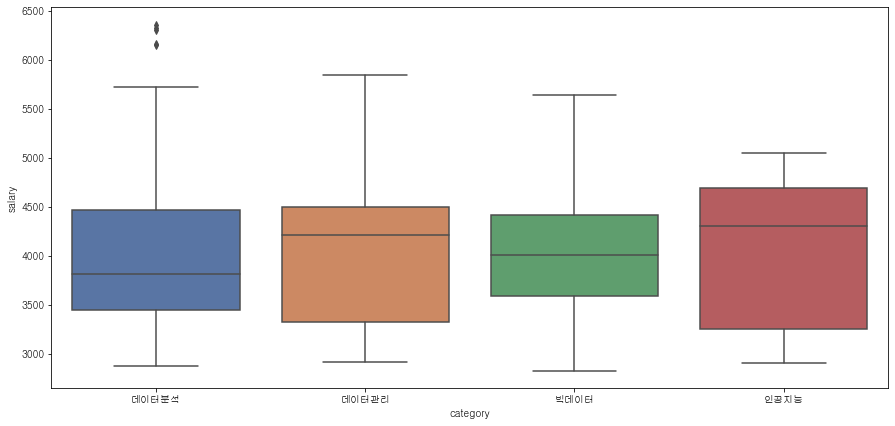

In [33]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

from matplotlib import font_manager
font_fname = "C:\\Windows\\Fonts\\gulim.ttc"
font_family = font_manager.FontProperties(fname=font_fname).get_name()
plt.rcParams["font.family"] = font_family
print(font_family)




fig, ax = plt.subplots(figsize=(15,7))
sns.set(style='whitegrid')
sns.boxplot(y=df_sal_unique["salary"],x=df_sal_unique["category"])
plt.show()

Gulim


Text(0.5, 1.0, '서울내 회사 평균연봉')

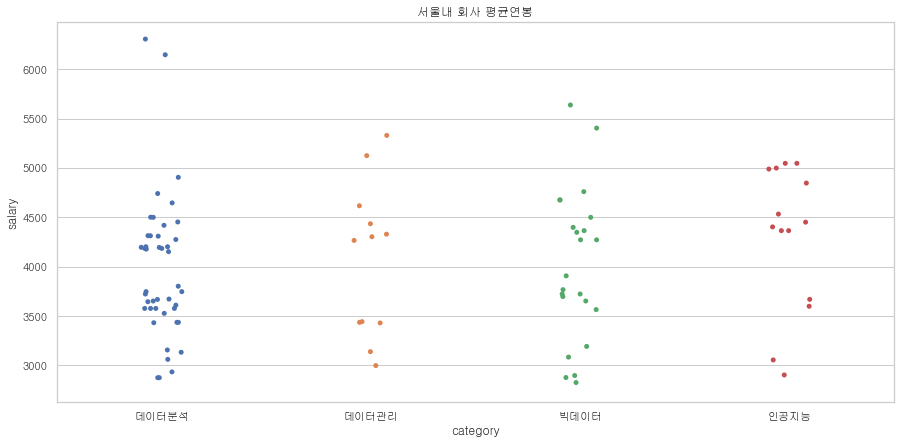

In [42]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

from matplotlib import font_manager
font_fname = "C:\\Windows\\Fonts\\gulim.ttc"
font_family = font_manager.FontProperties(fname=font_fname).get_name()
plt.rcParams["font.family"] = font_family
print(font_family)
fig, ax = plt.subplots(figsize=(15,7))
sns.stripplot(y="salary",data=df_s_seoul,x="category",edgecolor="gray")
plt.title("서울내 회사 평균연봉")

In [35]:
# 전국단위별 연봉 비교!!

Gulim


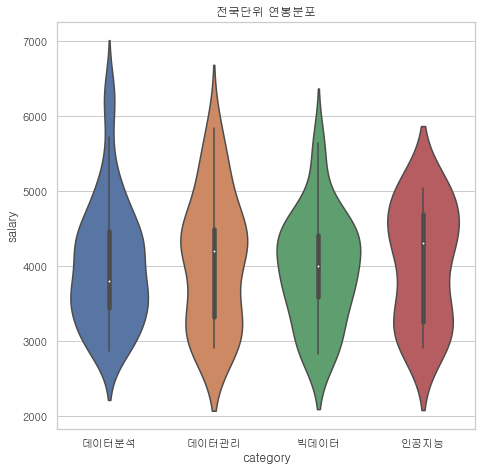

In [43]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

from matplotlib import font_manager
font_fname = "C:\\Windows\\Fonts\\gulim.ttc"
font_family = font_manager.FontProperties(fname=font_fname).get_name()
plt.rcParams["font.family"] = font_family
print(font_family)
fig, ax = plt.subplots(figsize=(7.5,7.5))
sns.violinplot(y="salary",data=df_sal_unique,x="category")
plt.title("전국단위 연봉분포")
plt.show()

In [44]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

from matplotlib import font_manager
font_fname = "C:\\Windows\\Fonts\\gulim.ttc"
font_family = font_manager.FontProperties(fname=font_fname).get_name()
plt.rcParams["font.family"] = font_family
print(font_family)

Gulim


Text(0.5, 1.0, '전국 지역별 회사 평균연봉')

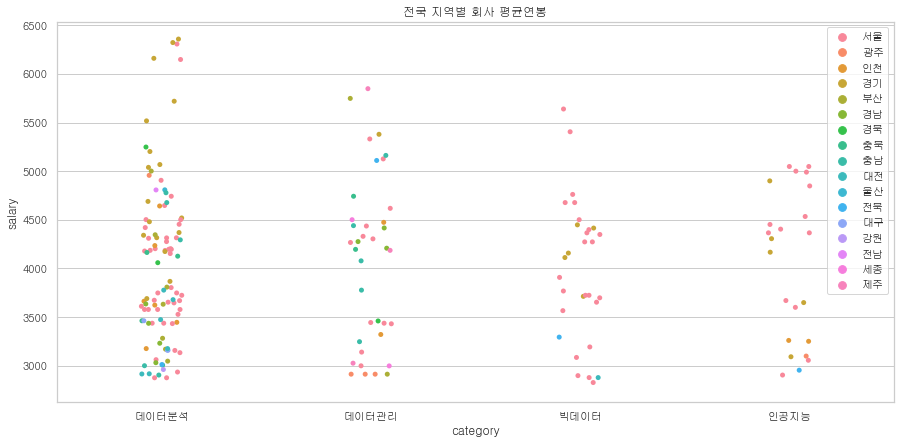

In [45]:




df_sal_unique["salary"].value_counts()


fig, ax = plt.subplots(figsize=(15,7))
sns.stripplot(y="salary",data=df_sal_unique,x="category",hue="city",edgecolor="gray")
plt.legend(loc=1)
plt.title("전국 지역별 회사 평균연봉")

Text(0.5, 1.0, '전국 지역별 회사 평균연봉')

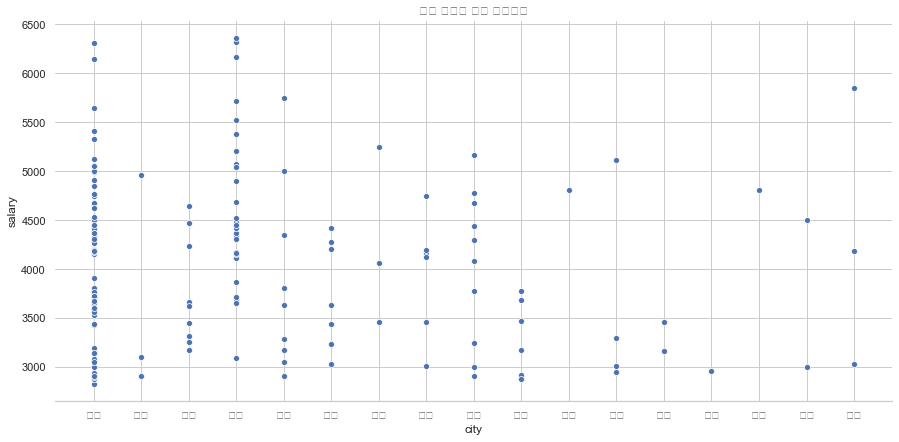

In [38]:

fig, ax = plt.subplots(figsize=(15,7))
sns.despine(fig, left=True, bottom=False)
sns.scatterplot(x="city",y="salary",data=df_sal_unique)
plt.title("전국 지역별 회사 평균연봉")

### 전국에서 평균연봉이 높은 회사는 어디일까?(07/09모집기준)

In [39]:
col_list =["category","city","region","coNm","title","contract","salary"]
df_sal_unique[df_sal_unique["salary"]==6358][col_list]

,category,city,region,coNm,title,contract,salary
1613,데이터분석,경기,성남시 분당구,라인플러스(주),2020년LINE경력개발자공개채용,정규직,6358


### 전국에서 평균연봉이 가장 낮은 회사는 어디일까?(07/09모집기준)

In [40]:
df_sal_unique["salary"].min()
df_sal_unique[df_sal_unique["salary"]==2827][col_list]

,category,city,region,coNm,title,contract,salary
2345,빅데이터,서울,광진구,건국대학교 대학원 의학과,영문교정/웹디자인/R프로그래밍/빅데이터,기간제계약직,2827
